In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

np.random.seed(42)

from matplotlib import pyplot
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings

warnings.filterwarnings(action='ignore')

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (9,748 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121918 files and dire

In [2]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')

# 전처리


In [119]:
train=pd.read_csv('/content/drive/MyDrive/데브코스/3차프로젝트/train.csv')
test=pd.read_csv('/content/drive/MyDrive/데브코스/3차프로젝트/test.csv')
submission=pd.read_csv('/content/drive/MyDrive/데브코스/3차프로젝트/sample_submission.csv')


In [120]:
train=train.drop('index', axis=1)
test=test.drop('index', axis=1)


In [121]:
train

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,F,N,N,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,-12079,-1984,1,0,0,0,Core staff,4.0,-2.0,1.0
26453,F,N,Y,1,180000.0,Working,Higher education,Separated,House / apartment,-15291,-2475,1,0,0,0,NaN,2.0,-47.0,2.0
26454,F,Y,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,-10082,-2015,1,0,0,0,Core staff,2.0,-25.0,2.0
26455,M,N,Y,0,171000.0,Working,Incomplete higher,Single / not married,House / apartment,-10145,-107,1,0,0,0,Laborers,1.0,-59.0,2.0


In [122]:
# 중복된 행 찾기
duplicate_rows = train[train.duplicated(subset=train.columns.difference(['credit']), keep=False)]

# credit이 가장 나쁜 행만 남기기
worst_credit_rows = duplicate_rows.sort_values(by='credit', ascending=True).drop_duplicates(subset=train.columns.difference(['credit']), keep='last')

# 중복 행 제외하기
train = train.drop_duplicates(subset=train.columns.difference(['credit']), keep=False)

# 나쁜 credit을 가진 행 제외하기
train = pd.concat([train, worst_credit_rows])

# 결과 확인
train

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0
5,F,N,Y,2,270000.0,Working,Secondary / secondary special,Married,House / apartment,-13413,-4996,1,0,0,1,High skill tech staff,4.0,-18.0,1.0
6,F,N,N,0,315000.0,Working,Secondary / secondary special,Separated,House / apartment,-17570,-1978,1,0,0,1,Core staff,1.0,-41.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4796,M,N,N,0,157500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15496,-2570,1,0,0,0,Laborers,2.0,-27.0,2.0
15312,F,N,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-18435,-2175,1,0,1,0,Sales staff,2.0,-10.0,2.0
15313,F,Y,Y,0,247500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-14667,-1422,1,0,0,0,Sales staff,2.0,-34.0,2.0
15284,M,Y,Y,0,103500.0,Working,Secondary / secondary special,Married,House / apartment,-18543,-1353,1,0,0,0,NaN,2.0,-11.0,2.0


In [123]:
train=train.drop('occyp_type', axis=1)
test=test.drop('occyp_type', axis=1)

In [124]:
unique_len = train.apply(lambda x : len(x.unique()))

unique_len

gender              2
car                 2
reality             2
child_num           9
income_total      249
income_type         5
edu_type            5
family_type         5
house_type          6
DAYS_BIRTH       6621
DAYS_EMPLOYED    3470
FLAG_MOBIL          1
work_phone          2
phone               2
email               2
family_size        10
begin_month        61
credit              3
dtype: int64

In [125]:


train=train.drop('FLAG_MOBIL', axis=1)
test=test.drop('FLAG_MOBIL', axis=1)

In [126]:
train['gender'] = train['gender'].replace(['F','M'],[0,1])
test['gender'] = test['gender'].replace(['F','M'],[0,1])
print(train['gender'].value_counts())

train['car'] = train['car'].replace(['N','Y'],[0,1])
test['car'] = test['car'].replace(['N','Y'],[0,1])
print(train['car'].value_counts())

train['reality'] = train['reality'].replace(['N','Y'],[0,1])
test['reality'] = test['reality'].replace(['N','Y'],[0,1])
print(train['reality'].value_counts())

print(train['phone'].value_counts())

print(train['email'].value_counts())

print(train['work_phone'].value_counts())

gender
0    16111
1     7993
Name: count, dtype: int64
car
0    14968
1     9136
Name: count, dtype: int64
reality
1    16219
0     7885
Name: count, dtype: int64
phone
0    17020
1     7084
Name: count, dtype: int64
email
0    21898
1     2206
Name: count, dtype: int64
work_phone
0    18706
1     5398
Name: count, dtype: int64


In [127]:
train=train.drop('child_num', axis=1)
test=test.drop('child_num', axis=1)
print(train['family_size'].value_counts())

family_size
2.0     12843
1.0      4633
3.0      4235
4.0      2074
5.0       266
6.0        38
7.0         9
15.0        3
9.0         2
20.0        1
Name: count, dtype: int64


In [128]:
quartiles = train['family_size'].quantile([0.25, 0.5, 0.75])
print(quartiles)

0.25    2.0
0.50    2.0
0.75    3.0
Name: family_size, dtype: float64


In [129]:
train.loc[train['family_size'] >= 4,'family_size']=4
test.loc[test['family_size']>=4, 'family_size']=4
print(train['family_size'].value_counts())

family_size
2.0    12843
1.0     4633
3.0     4235
4.0     2393
Name: count, dtype: int64


In [130]:
def days_to_year(x):
    if x<0:
        return (x*(-1))/365
    return 0

def minus_to_plus(x):
    if x<0:
        return x*(-1)
    return 0

In [131]:
train['DAYS_BIRTH'] = train['DAYS_BIRTH'].apply(days_to_year)
train['DAYS_EMPLOYED'] = train['DAYS_EMPLOYED'].apply(days_to_year)
train['begin_month'] = train['begin_month'].apply(minus_to_plus)

test['DAYS_BIRTH'] = test['DAYS_BIRTH'].apply(days_to_year)
test['DAYS_EMPLOYED'] = test['DAYS_EMPLOYED'].apply(days_to_year)
test['begin_month'] = test['begin_month'].apply(minus_to_plus)


In [132]:
#생략 가능

train['family_size'] = train['family_size'].astype('int64')
test['family_size'] = test['family_size'].astype('int64')

train['begin_month'] = train['begin_month'].astype('int64')
test['begin_month'] = test['begin_month'].astype('int64')

In [133]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24104 entries, 0 to 13115
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         24104 non-null  int64  
 1   car            24104 non-null  int64  
 2   reality        24104 non-null  int64  
 3   income_total   24104 non-null  float64
 4   income_type    24104 non-null  object 
 5   edu_type       24104 non-null  object 
 6   family_type    24104 non-null  object 
 7   house_type     24104 non-null  object 
 8   DAYS_BIRTH     24104 non-null  float64
 9   DAYS_EMPLOYED  24104 non-null  float64
 10  work_phone     24104 non-null  int64  
 11  phone          24104 non-null  int64  
 12  email          24104 non-null  int64  
 13  family_size    24104 non-null  int64  
 14  begin_month    24104 non-null  int64  
 15  credit         24104 non-null  float64
dtypes: float64(4), int64(8), object(4)
memory usage: 3.1+ MB


In [134]:
train.head()

,gender,car,reality,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,credit
0,0,0,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,38.079452,12.901370,0,0,0,2,6,1.0
3,0,0,1,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,41.336986,5.731507,0,1,0,2,37,0.0
4,0,1,1,157500.0,State servant,Higher education,Married,House / apartment,41.197260,5.767123,0,0,0,2,26,2.0
5,0,0,1,270000.0,Working,Secondary / secondary special,Married,House / apartment,36.747945,13.687671,0,0,1,4,18,1.0
6,0,0,0,315000.0,Working,Secondary / secondary special,Separated,House / apartment,48.136986,5.419178,0,0,1,1,41,2.0


# 여기까지 기본 전처리

# 라벨 인코딩

In [135]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24104 entries, 0 to 13115
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         24104 non-null  int64  
 1   car            24104 non-null  int64  
 2   reality        24104 non-null  int64  
 3   income_total   24104 non-null  float64
 4   income_type    24104 non-null  object 
 5   edu_type       24104 non-null  object 
 6   family_type    24104 non-null  object 
 7   house_type     24104 non-null  object 
 8   DAYS_BIRTH     24104 non-null  float64
 9   DAYS_EMPLOYED  24104 non-null  float64
 10  work_phone     24104 non-null  int64  
 11  phone          24104 non-null  int64  
 12  email          24104 non-null  int64  
 13  family_size    24104 non-null  int64  
 14  begin_month    24104 non-null  int64  
 15  credit         24104 non-null  float64
dtypes: float64(4), int64(8), object(4)
memory usage: 3.1+ MB


In [136]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

train['income_type'] = label_encoder.fit_transform(train['income_type'])
test['income_type'] = label_encoder.transform(test['income_type'])

#교육 수준 순서 고려
edu_type_mapping = {
    'Lower secondary': 0,
    'Secondary / secondary special': 1,
    'Incomplete higher': 2,
    'Higher education': 3,
    'Academic degree': 4
}
train['edu_type'] = train['edu_type'].map(edu_type_mapping)
test['edu_type'] = test['edu_type'].map(edu_type_mapping)

train['family_type'] = label_encoder.fit_transform(train['family_type'])
test['family_type'] = label_encoder.transform(test['family_type'])

train['house_type'] = label_encoder.fit_transform(train['house_type'])
test['house_type'] = label_encoder.transform(test['house_type'])

In [137]:
train.head()

,gender,car,reality,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,credit
0,0,0,0,202500.0,0,3,1,2,38.079452,12.901370,0,0,0,2,6,1.0
3,0,0,1,202500.0,0,1,1,1,41.336986,5.731507,0,1,0,2,37,0.0
4,0,1,1,157500.0,2,3,1,1,41.197260,5.767123,0,0,0,2,26,2.0
5,0,0,1,270000.0,4,1,1,1,36.747945,13.687671,0,0,1,4,18,1.0
6,0,0,0,315000.0,4,1,2,1,48.136986,5.419178,0,0,1,1,41,2.0


In [138]:
test.head()

,gender,car,reality,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month
0,1,1,0,112500.0,1,1,0,1,60.246575,0.000000,0,1,0,2,60
1,0,0,1,135000.0,2,3,1,1,51.956164,23.756164,0,1,0,2,36
2,0,0,1,69372.0,4,1,1,1,43.526027,0.594521,1,1,0,2,40
3,1,1,0,112500.0,0,1,1,1,52.794521,6.934247,1,0,0,2,41
4,0,1,1,225000.0,2,3,1,1,48.827397,25.712329,1,0,0,2,8


# Decision Tree

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

X = train.drop('credit', axis=1)
y = train['credit']

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
test_scaled=scaler.transform(test)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [99]:
from sklearn.model_selection import GridSearchCV

# 튜닝할 하이퍼파라미터 설정
param_grid = {
    'max_depth' : [3,5,10,15,20,30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 그리드 탐색을 위한 모델 및 파라미터 설정
model = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# 모델 훈련 및 최적의 파라미터 찾기
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:", grid_search.best_params_)

# 최적의 모델
best_model = grid_search.best_estimator_

# 테스트 세트에서 모델 평가
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("테스트 세트 정확도:", accuracy)

최적의 하이퍼파라미터: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
테스트 세트 정확도: 0.7118855009334163


In [100]:
model = DecisionTreeClassifier(max_depth=3, min_samples_leaf=1,min_samples_split=2,random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


#logloss 값 출력
from sklearn.metrics import log_loss

# 모델 예측 확률 계산
y_pred_proba = model.predict_proba(X_test)

# 로그 손실 계산
logloss = log_loss(y_test, y_pred_proba)
print("Log Loss:", logloss)

Accuracy: 0.7118855009334163
Log Loss: 0.7704828210742793


In [140]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

X = train.drop('credit', axis=1)
y = train['credit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

[Text(0.5, 0.875, 'begin_month <= 3.5\ngini = 0.504\nsamples = 19283\nvalue = [2184, 4452, 12647]\nclass = 2.0'),
 Text(0.25, 0.625, 'begin_month <= 0.5\ngini = 0.34\nsamples = 1253\nvalue = [253, 986, 14]\nclass = 1.0'),
 Text(0.125, 0.375, 'reality <= 0.5\ngini = 0.458\nsamples = 163\nvalue = [58, 105, 0]\nclass = 1.0'),
 Text(0.0625, 0.125, 'gini = 0.5\nsamples = 49\nvalue = [25, 24, 0]\nclass = 0.0'),
 Text(0.1875, 0.125, 'gini = 0.411\nsamples = 114\nvalue = [33, 81, 0]\nclass = 1.0'),
 Text(0.375, 0.375, 'DAYS_BIRTH <= 22.125\ngini = 0.315\nsamples = 1090\nvalue = [195, 881, 14]\nclass = 1.0'),
 Text(0.3125, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [1, 0, 1]\nclass = 0.0'),
 Text(0.4375, 0.125, 'gini = 0.312\nsamples = 1088\nvalue = [194, 881, 13]\nclass = 1.0'),
 Text(0.75, 0.625, 'begin_month <= 4.5\ngini = 0.461\nsamples = 18030\nvalue = [1931, 3466, 12633]\nclass = 2.0'),
 Text(0.625, 0.375, 'DAYS_BIRTH <= 39.292\ngini = 0.602\nsamples = 396\nvalue = [51, 160, 185]\nclass = 2

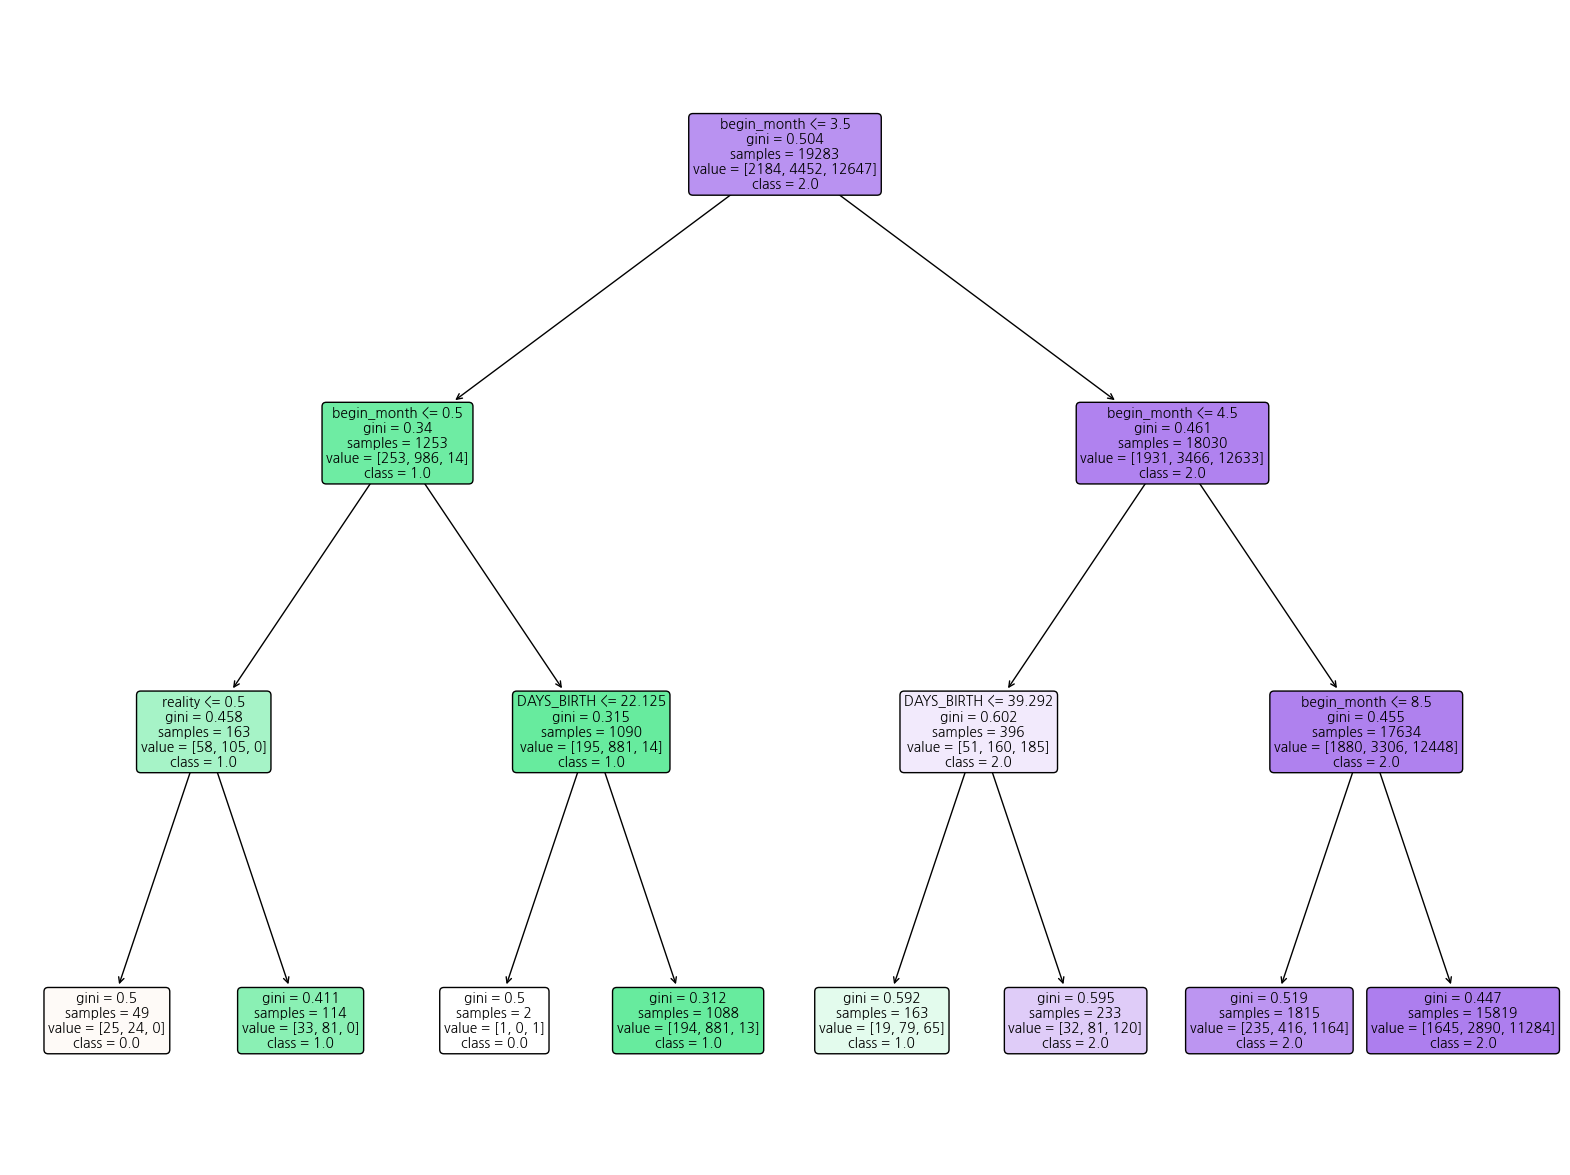

In [141]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn import tree

model = DecisionTreeClassifier(max_depth=3, min_samples_leaf=1,min_samples_split=2,random_state=42)
model.fit(X_train, y_train)

# 클래스 레이블과 특성 이름 가져오기
class_names = np.unique(y).astype(str).tolist()
feature_names = X.columns.tolist()

# 결정트리 규칙 시각화
plt.figure(figsize=(20, 15))
tree.plot_tree(model,
               class_names=class_names,
               feature_names=feature_names,
               impurity=True,
               filled=True,
               rounded=True)


In [172]:
#credit에 가장 큰 영향을 끼치는 것은 begin_month, DAYS_BIRTH, reality로 확인
df=pd.read_csv('/content/drive/MyDrive/데브코스/3차프로젝트/train.csv')
# credit 값에 따라 치환
df['credit'] = df['credit'].replace({0: 'low', 1: 'mod', 2: 'high'})

df


,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,mod
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,mod
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,high
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,low
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,F,N,N,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,-12079,-1984,1,0,0,0,Core staff,4.0,-2.0,mod
26453,26453,F,N,Y,1,180000.0,Working,Higher education,Separated,House / apartment,-15291,-2475,1,0,0,0,NaN,2.0,-47.0,high
26454,26454,F,Y,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,-10082,-2015,1,0,0,0,Core staff,2.0,-25.0,high
26455,26455,M,N,Y,0,171000.0,Working,Incomplete higher,Single / not married,House / apartment,-10145,-107,1,0,0,0,Laborers,1.0,-59.0,high


In [174]:
df[df['begin_month']==0]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
81,81,M,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,House / apartment,-10314,-962,1,0,0,1,Sales staff,2.0,0.0,low
119,119,F,N,Y,2,144000.0,Working,Secondary / secondary special,Married,House / apartment,-12393,-1854,1,1,1,0,Cooking staff,4.0,0.0,mod
210,210,F,Y,Y,1,225000.0,Working,Higher education,Separated,House / apartment,-14816,-1672,1,0,0,0,Core staff,2.0,0.0,mod
278,278,F,N,Y,0,180000.0,Working,Higher education,Married,House / apartment,-14083,-7049,1,1,0,0,Core staff,2.0,0.0,mod
333,333,M,Y,Y,0,184500.0,State servant,Higher education,Married,House / apartment,-13916,-169,1,0,0,0,Managers,2.0,0.0,mod
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26097,26097,M,N,N,0,315000.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-11981,-703,1,1,0,0,Drivers,1.0,0.0,mod
26127,26127,F,Y,Y,0,279000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21177,365243,1,0,0,0,NaN,2.0,0.0,mod
26198,26198,M,N,Y,0,135000.0,Working,Secondary / secondary special,Married,House / apartment,-15484,-1408,1,1,1,0,Drivers,2.0,0.0,low
26213,26213,M,N,N,2,216000.0,Working,Secondary / secondary special,Married,House / apartment,-14740,-1040,1,0,1,0,Laborers,4.0,0.0,low


# 나이와 신용도는 관련이 있을 것이다

```
# 코드로 형식 지정됨
```



In [146]:
df['DAYS_BIRTH']=-df['DAYS_BIRTH']

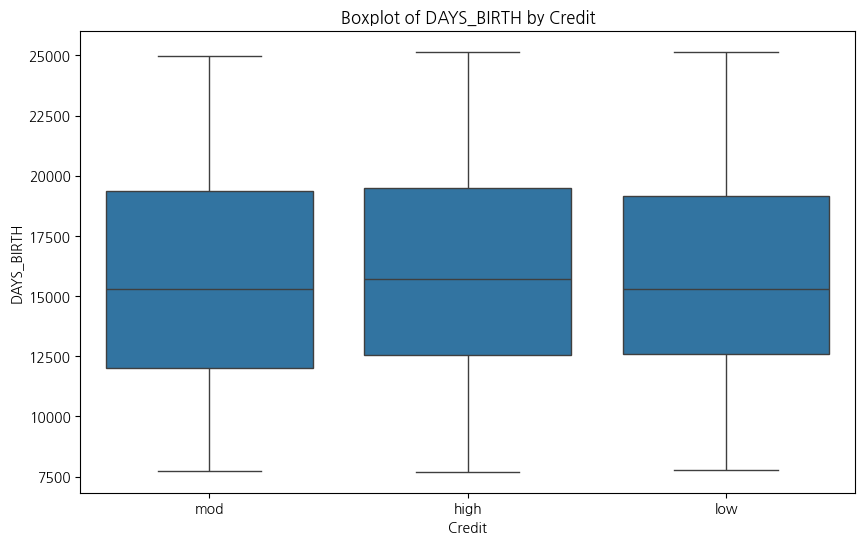

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt

# credit 별로 DAYS_BIRTH 데이터 추출
credit_0 = df[df['credit'] == 0]['DAYS_BIRTH']
credit_1 = df[df['credit'] == 1]['DAYS_BIRTH']
credit_2 = df[df['credit'] == 2]['DAYS_BIRTH']

# 박스플롯 그리기
plt.figure(figsize=(10, 6))
sns.boxplot(x='credit', y='DAYS_BIRTH', data=df)
plt.title('Boxplot of DAYS_BIRTH by Credit')
plt.xlabel('Credit')
plt.ylabel('DAYS_BIRTH')
plt.show()

#이렇게 봤을땐 큰 차이는 없었음

In [149]:
# 음수로 표현된 나이를 양수로 변환하여 나이 계산
df=pd.read_csv('/content/drive/MyDrive/데브코스/3차프로젝트/train.csv')
df['credit'] = df['credit'].replace({0: 'low', 1: 'mod', 2: 'high'})

df['age'] = -df['DAYS_BIRTH'] // 365

# 나이를 기준으로 20대, 30대, 40대, 50대, 60대로 나누어 범주형 변수 생성
df['age'] = pd.cut(df['age'], bins=[20, 30, 40, 50, 60, float('inf')], labels=['20대', '30대', '40대', '50대', '60대 이상'], right=False)

# 결과 확인
df[['DAYS_BIRTH','age']]


,DAYS_BIRTH,age
0,-13899,30대
1,-11380,30대
2,-19087,50대
3,-15088,40대
4,-15037,40대
...,...,...
26452,-12079,30대
26453,-15291,40대
26454,-10082,20대
26455,-10145,20대


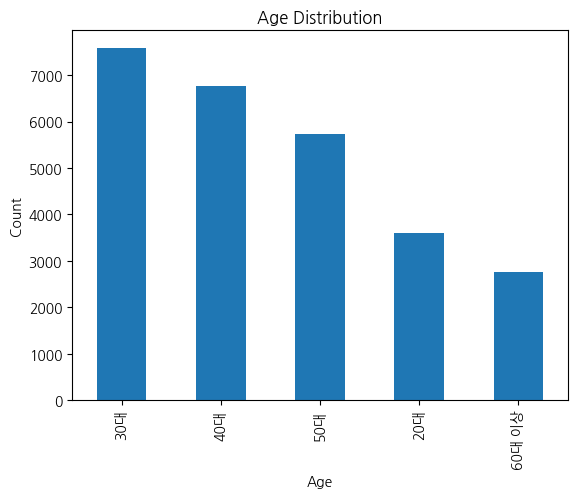

In [150]:
import matplotlib.pyplot as plt

# 'age' 열의 값에 대한 카운트
age_counts = df['age'].value_counts()

# 막대 그래프로 표시
age_counts.plot(kind='bar')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


In [151]:
# credit와 age 변수를 기준으로 그룹화하여 각 그룹의 개수를 계산
grouped = df.groupby(['credit', 'age']).size().unstack()

# 각 그룹별로 합계를 구해서 비율을 계산
grouped_percentage = grouped.div(grouped.sum(axis=1), axis=0)

# 결과 출력
print(grouped_percentage)

#20대는 credit이 중간인 경우가 많았다 -> 소득이나 경제활동이 다른 나이대에 비해 없어서 그런거아닐까?
#30대는 credit이 좋은 경우가 많고,
#40대는 중간인 경우가 가장 적고 좋거나, 안 좋은 경우가 비슷했다
#50대 60대는 비슷했다.

age          20대       30대       40대       50대    60대 이상
credit                                                  
high    0.128713  0.283593  0.262435  0.219943  0.105316
low     0.121353  0.311918  0.252948  0.214773  0.099007
mod     0.164832  0.282113  0.239509  0.209829  0.103718


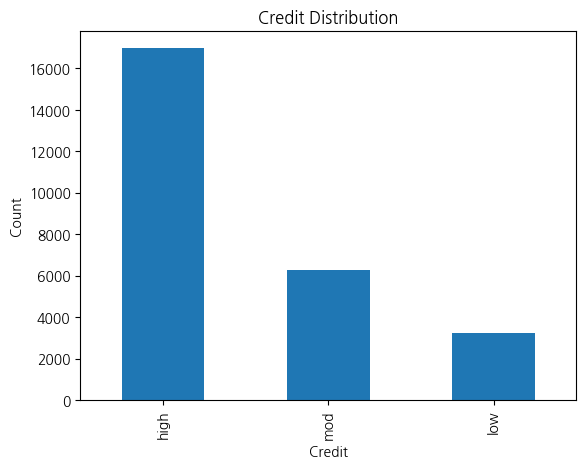

In [152]:
import matplotlib.pyplot as plt

# 'credit' 열의 값에 대한 카운트
credit_counts = df['credit'].value_counts()

# 막대 그래프로 표시
credit_counts.plot(kind='bar')
plt.title('Credit Distribution')
plt.xlabel('Credit')
plt.ylabel('Count')
plt.show()


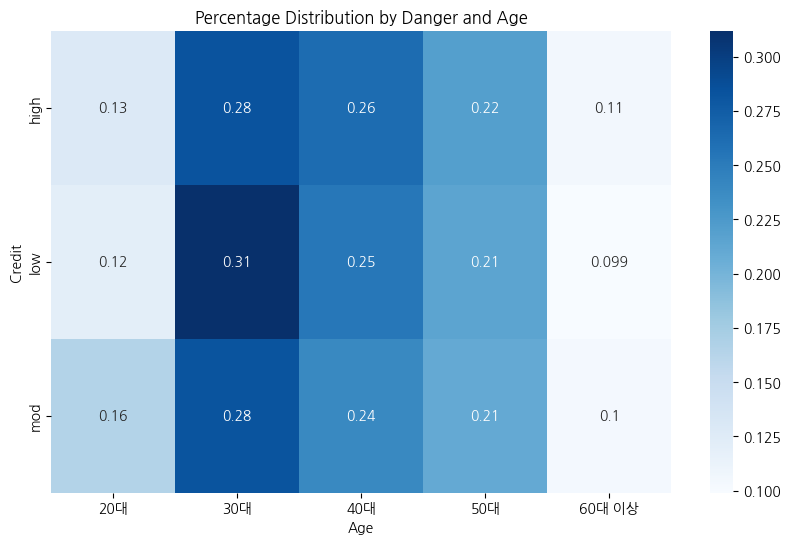

In [153]:
import seaborn as sns
import matplotlib.pyplot as plt

# 히트맵으로 표시
plt.figure(figsize=(10, 6))
sns.heatmap(grouped_percentage, annot=True, cmap='Blues')
plt.title('Percentage Distribution by Danger and Age')
plt.xlabel('Age')
plt.ylabel('Credit')
plt.show()

# begin_month와 신용도는 차이가 있지 않을까?

In [154]:
df=pd.read_csv('/content/drive/MyDrive/데브코스/3차프로젝트/train.csv')
df['credit'] = df['credit'].replace({0: 'low', 1: 'mod', 2: 'high'})

In [155]:
df['begin_month']=-df['begin_month']

In [156]:
df['begin_month'].describe()

count    26457.000000
mean        26.123294
std         16.559550
min         -0.000000
25%         12.000000
50%         24.000000
75%         39.000000
max         60.000000
Name: begin_month, dtype: float64

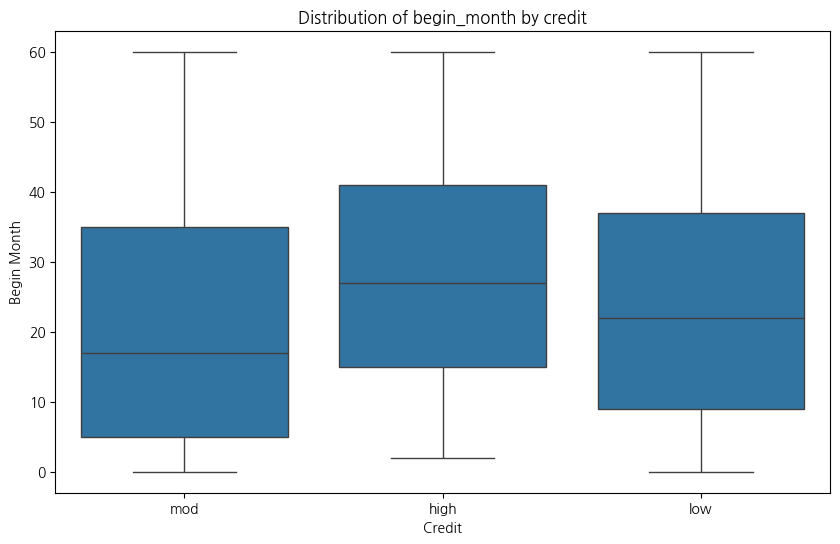

In [157]:
import seaborn as sns
import matplotlib.pyplot as plt

# credit 별 begin_month 분포 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(x='credit', y='begin_month', data=df)
plt.title('Distribution of begin_month by credit')
plt.xlabel('Credit')
plt.ylabel('Begin Month')
plt.show()


In [158]:
mean_beginmonth_by_credit = df.groupby('credit')['begin_month'].mean()
print(mean_beginmonth_by_credit)

credit
high    28.391914
low     23.987896
mod     21.078826
Name: begin_month, dtype: float64


In [160]:
# begin_month를 년도로 변환하여 새로운 변수 생성
import numpy as np


# begin_month를 년도로 변환하여 새로운 변수 생성 (올림 연산)
df['begin_year'] = np.ceil(df['begin_month'] / 12).astype(int)

df['begin_year'].value_counts()
#0은 아예 신용카드 없는 애들

begin_year
1    6818
2    6270
3    5250
4    4594
5    3294
0     231
Name: count, dtype: int64

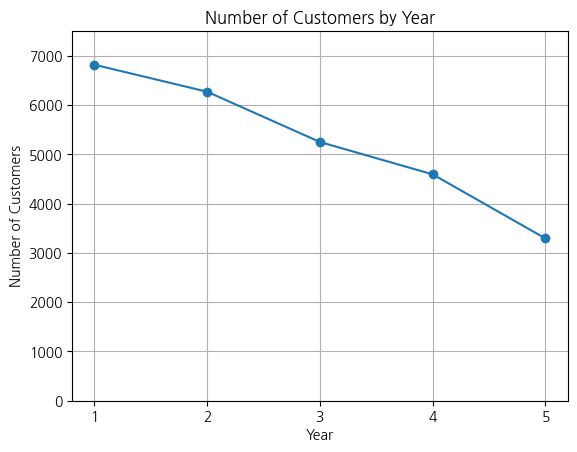

In [171]:
import matplotlib.pyplot as plt

# 'begin_year' 열의 값에 대한 카운트
begin_year_counts = df['begin_year'].value_counts()

# 'begin_year' 값이 0인 경우 제외
begin_year_counts = begin_year_counts.drop(0)

# 꺾은선 그래프로 표시
plt.plot(begin_year_counts.index, begin_year_counts.values, marker='o', linestyle='-')
plt.title('Number of Customers by Year')
plt.xlabel('Year')
plt.ylabel('Number of Customers')
plt.xticks(begin_year_counts.index)
plt.grid(True)

# y 축 범위를 0부터 8000까지 설정
plt.ylim(0, 7500)

plt.show()




In [162]:
import pandas as pd

# credit 별 begin_year 비율 살펴보기
begin_year_credit_ratio = pd.crosstab(df['credit'], df['begin_year'], normalize='index')
print(begin_year_credit_ratio)

#신용카드 없는 경우에는 credit이 0,1 뿐 아주 나쁜 경우는 없음
#신용카드 1년차까지는 보통인 경우가 제일 많고 나쁜 경우 제일 적음
#2년차~5년차까지는 신용등급이 나쁜 경우가 제일 많아짐

begin_year         0         1         2         3         4         5
credit                                                                
high        0.000000  0.200259  0.254715  0.214050  0.192362  0.138614
low         0.025760  0.296710  0.225947  0.188082  0.155183  0.108318
mod         0.023616  0.393171  0.194670  0.161481  0.132440  0.094623


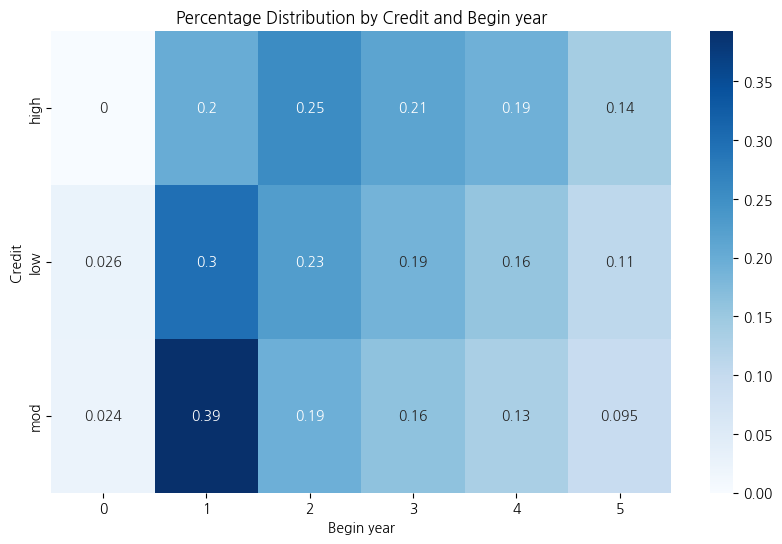

In [164]:
# 히트맵으로 표시
plt.figure(figsize=(10, 6))
sns.heatmap(begin_year_credit_ratio, annot=True, cmap='Blues')
plt.title('Percentage Distribution by Credit and Begin year')
plt.xlabel('Begin year')
plt.ylabel('Credit')
plt.show()